<a href="https://colab.research.google.com/github/sheikhyounus123/pnemounoconosis-_detection/blob/main/inceptionv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful

In [ ]:
from tensorflow.keras.models import load_model

# Load the model from the saved location in Google Drive
model_path = '/content/drive/MyDrive/saved_models/inceptionv3_pneumoconiosis_model.h5'
model = load_model(model_path)

# Print the model summary to verify
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 299, 299, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 149, 149, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 149, 149, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 149, 149, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 147, 147, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 147, 147, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 147, 147, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 147, 147, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 147, 147, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 147, 147, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 73, 73, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 73, 73, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 73, 73, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 73, 73, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 71, 71, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 71, 71, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 23,901,987 (91.18 MB)

 Trainable params: 2,099,201 (8.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
import os
import random

# Define the directories for infected and non-infected images
infected_dir = '/content/drive/MyDrive/data and models/data/chest/Chest_infected'
non_infected_dir = '/content/drive/MyDrive/data and models/data/chest/Chest_Noninfected'

# List images from both directories
infected_images = os.listdir(infected_dir)
non_infected_images = os.listdir(non_infected_dir)

# Sample a few images from each directory
sample_infected = random.sample(infected_images, 3)  # Get 3 random infected images
sample_non_infected = random.sample(non_infected_images, 3)  # Get 3 random non-infected images


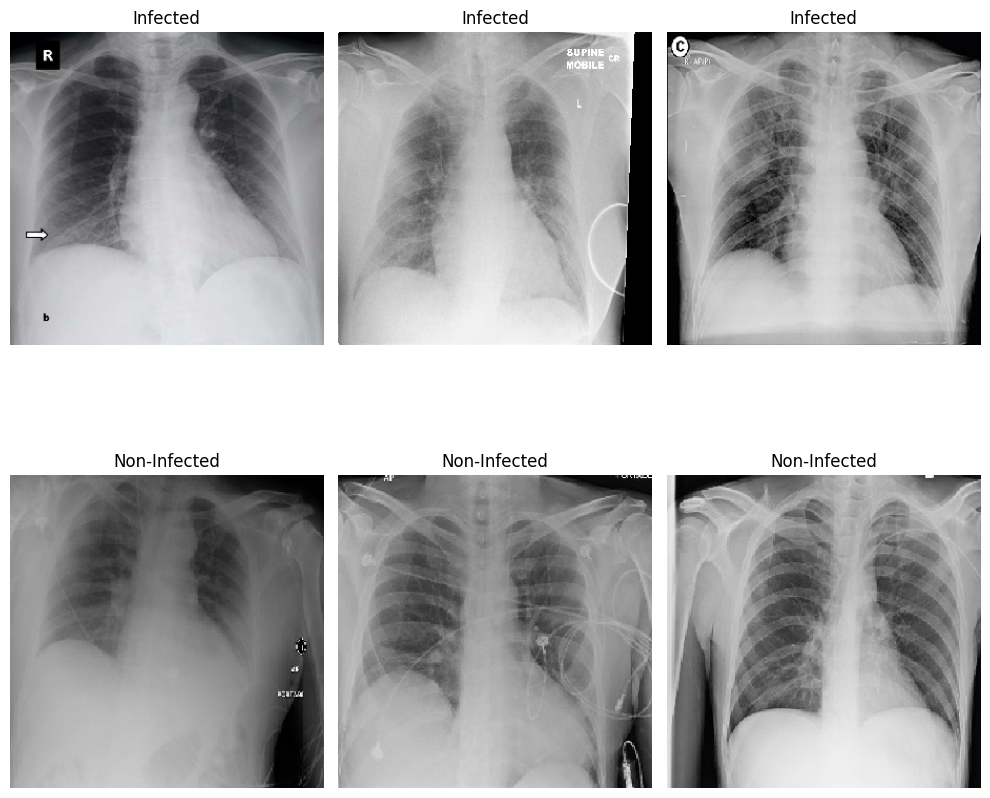

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to display an image
def display_image(img_path):
    img = image.load_img(img_path, target_size=(299, 299))  # Use the target size used during training
    img_array = image.img_to_array(img) / 255.0  # Normalize
    plt.imshow(np.squeeze(img_array))  # Remove batch dimension for display
    plt.axis('off')

# Display images
plt.figure(figsize=(10, 10))

# Display 3 infected images
for i, img_name in enumerate(sample_infected):
    plt.subplot(2, 3, i+1)
    display_image(os.path.join(infected_dir, img_name))
    plt.title("Infected")

# Display 3 non-infected images
for i, img_name in enumerate(sample_non_infected):
    plt.subplot(2, 3, i+4)
    display_image(os.path.join(non_infected_dir, img_name))
    plt.title("Non-Infected")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Function to prepare an image for prediction (resize, normalize, and add batch dimension)
def prepare_image(img_path, target_size=(299, 299)):
    img = image.load_img(img_path, target_size=target_size)  # Resize the image
    img_array = image.img_to_array(img) / 255.0  # Normalize the image (as done during training)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Specify the image path you want to predict
img_path = '/content/drive/MyDrive/images_medium_g06ja15g7a.jpeg'

# Prepare the image
img_array = prepare_image(img_path)


In [ ]:
# Predict the image using the loaded model
prediction = model.predict(img_array)[0]  # Get the prediction

# Print the prediction result
if prediction >= 0.5:
    print("Prediction: Non-Infected")
else:
    print("Prediction: Infected")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction: Infected


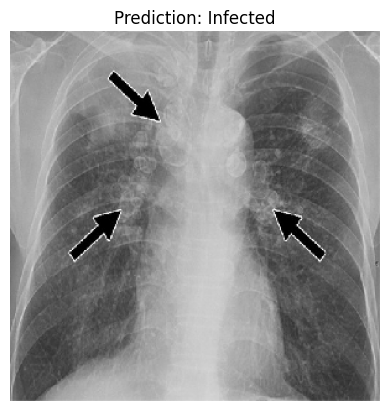

In [ ]:
# Display the image with the prediction
img = image.load_img(img_path, target_size=(299, 299))
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {'Non-Infected' if prediction >= 0.5 else 'Infected'}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

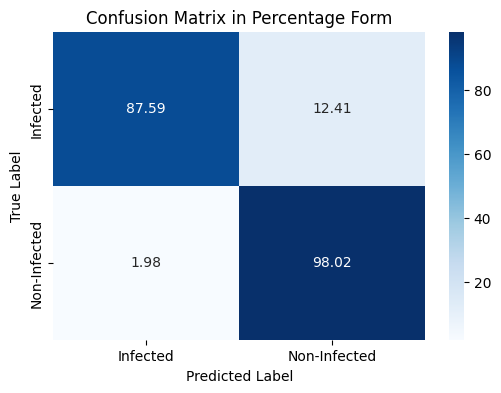

              precision    recall  f1-score   support

    Infected       0.97      0.88      0.92       435
Non-Infected       0.90      0.98      0.94       505

    accuracy                           0.93       940
   macro avg       0.94      0.93      0.93       940
weighted avg       0.94      0.93      0.93       940



In [ ]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to prepare the image for prediction
def prepare_image(img_path, target_size=(299, 299)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Assuming the infected and non-infected directories are already defined
infected_dir = '/content/drive/MyDrive/data and models/data/chest/Chest_infected'
non_infected_dir = '/content/drive/MyDrive/data and models/data/chest/Chest_Noninfected'

# Get all image file paths
infected_images = [os.path.join(infected_dir, img) for img in os.listdir(infected_dir)]
non_infected_images = [os.path.join(non_infected_dir, img) for img in os.listdir(non_infected_dir)]

# Create lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Predict for infected images (true label = 0)
for img_path in infected_images:
    img_array = prepare_image(img_path)
    prediction = model.predict(img_array)[0]
    predicted_labels.append(1 if prediction >= 0.5 else 0)  # Apply threshold 0.5
    true_labels.append(0)  # True label for infected is 0

# Predict for non-infected images (true label = 1)
for img_path in non_infected_images:
    img_array = prepare_image(img_path)
    prediction = model.predict(img_array)[0]
    predicted_labels.append(1 if prediction >= 0.5 else 0)  # Apply threshold 0.5
    true_labels.append(1)  # True label for non-infected is 1

# Step 3: Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Normalize the confusion matrix to percentage form
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Step 4: Plot the confusion matrix in percentage form
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=['Infected', 'Non-Infected'],
            yticklabels=['Infected', 'Non-Infected'])

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix in Percentage Form')
plt.show()

# Optional: Print classification report
print(classification_report(true_labels, predicted_labels, target_names=['Infected', 'Non-Infected']))


In [ ]:
# Predict and print the result for a single image
image_path = '/content/drive/MyDrive/images_medium_g06ja15g7a.jpeg'
prediction = model.predict(np.expand_dims(image.img_to_array(image.load_img(image_path, target_size=(299, 299))) / 255.0, axis=0))[0]

print(f"Prediction: {'Infected' if prediction <= 0.5 else 'Non-Infected'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
Prediction: Infected
